In [1]:
import sys
sys.path.append("..")

In [2]:
print(sys.version)

2.7.15 (default, Jun 21 2018, 11:39:23) 
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]


In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
import qnm

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)

### Download the precomputed data, if needed. This only has to happen once.

In [6]:
qnm.download_data()

Destination path /Users/leo/src/spectral_qnms/qnm/data.tar.bz2 already exists, use overwrite=True to force an overwrite.


### Load a single 'spin sequence' and get values of frequency, separation constant, and the spherical-spheroidal decomposition

In [7]:
ksc = qnm.cached.KerrSeqCache(init_schw=True) # Only need init_schw once

In [8]:
s, l, m, n = (-2, 2, 2, 0)
mode_seq = ksc(s=s,l=l,m=m,n=n)
a = 0.68
omega, A, C = mode_seq(a=a)
print("omega_{{{0},{1},{2},{3}}} = {4}, A{{{0},{1},{2},{3}}} = {5}".format(s,l,m,n,omega,A))

omega_{-2,2,2,0} = (0.52397510429-0.0815126236312j), A{-2,2,2,0} = (2.95633579451+0.178052173926j)


### Visualize a collection of spin sequences in the complex $\omega$ plane, and their associated separation constants

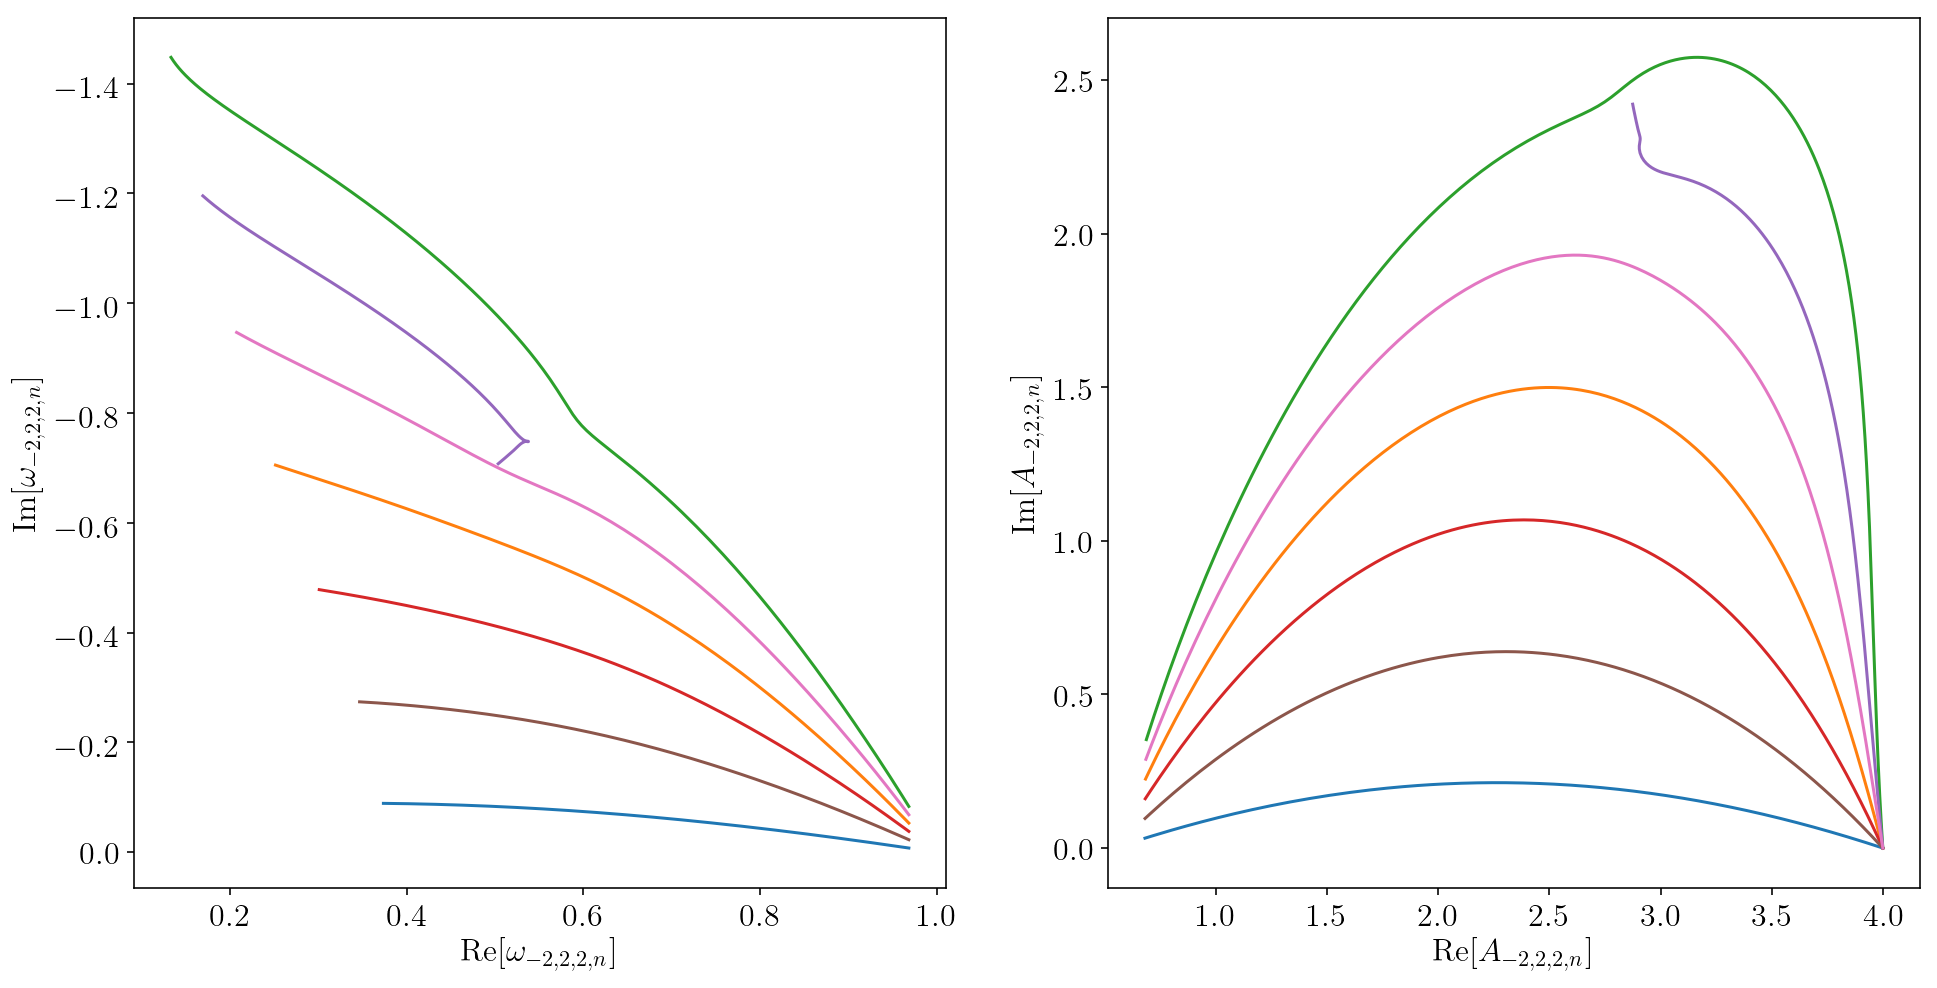

In [9]:
s, l, m = (-2, 2, 2)
mode_list = [(s, l, m, n) for n in np.arange(0,7)]
modes = {}
for ind in mode_list:
    modes[ind] = ksc(*ind)

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)   
for mode, seq in modes.iteritems():
    plt.plot(np.real(seq.omega),np.imag(seq.omega))
    

modestr = "{},{},{},n".format(s,l,m)
plt.xlabel(r'$\textrm{Re}[\omega_{' + modestr + r'}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[\omega_{' + modestr + r'}]$', fontsize=16)
plt.gca().tick_params(labelsize=16)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)   
for mode, seq in modes.iteritems():
    plt.plot(np.real(seq.A),np.imag(seq.A))
    
plt.xlabel(r'$\textrm{Re}[A_{' + modestr + r'}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[A_{' + modestr + r'}]$', fontsize=16)
plt.gca().tick_params(labelsize=16)

plt.savefig("example_22n.png", bbox_inches="tight", dpi=300)

plt.show()

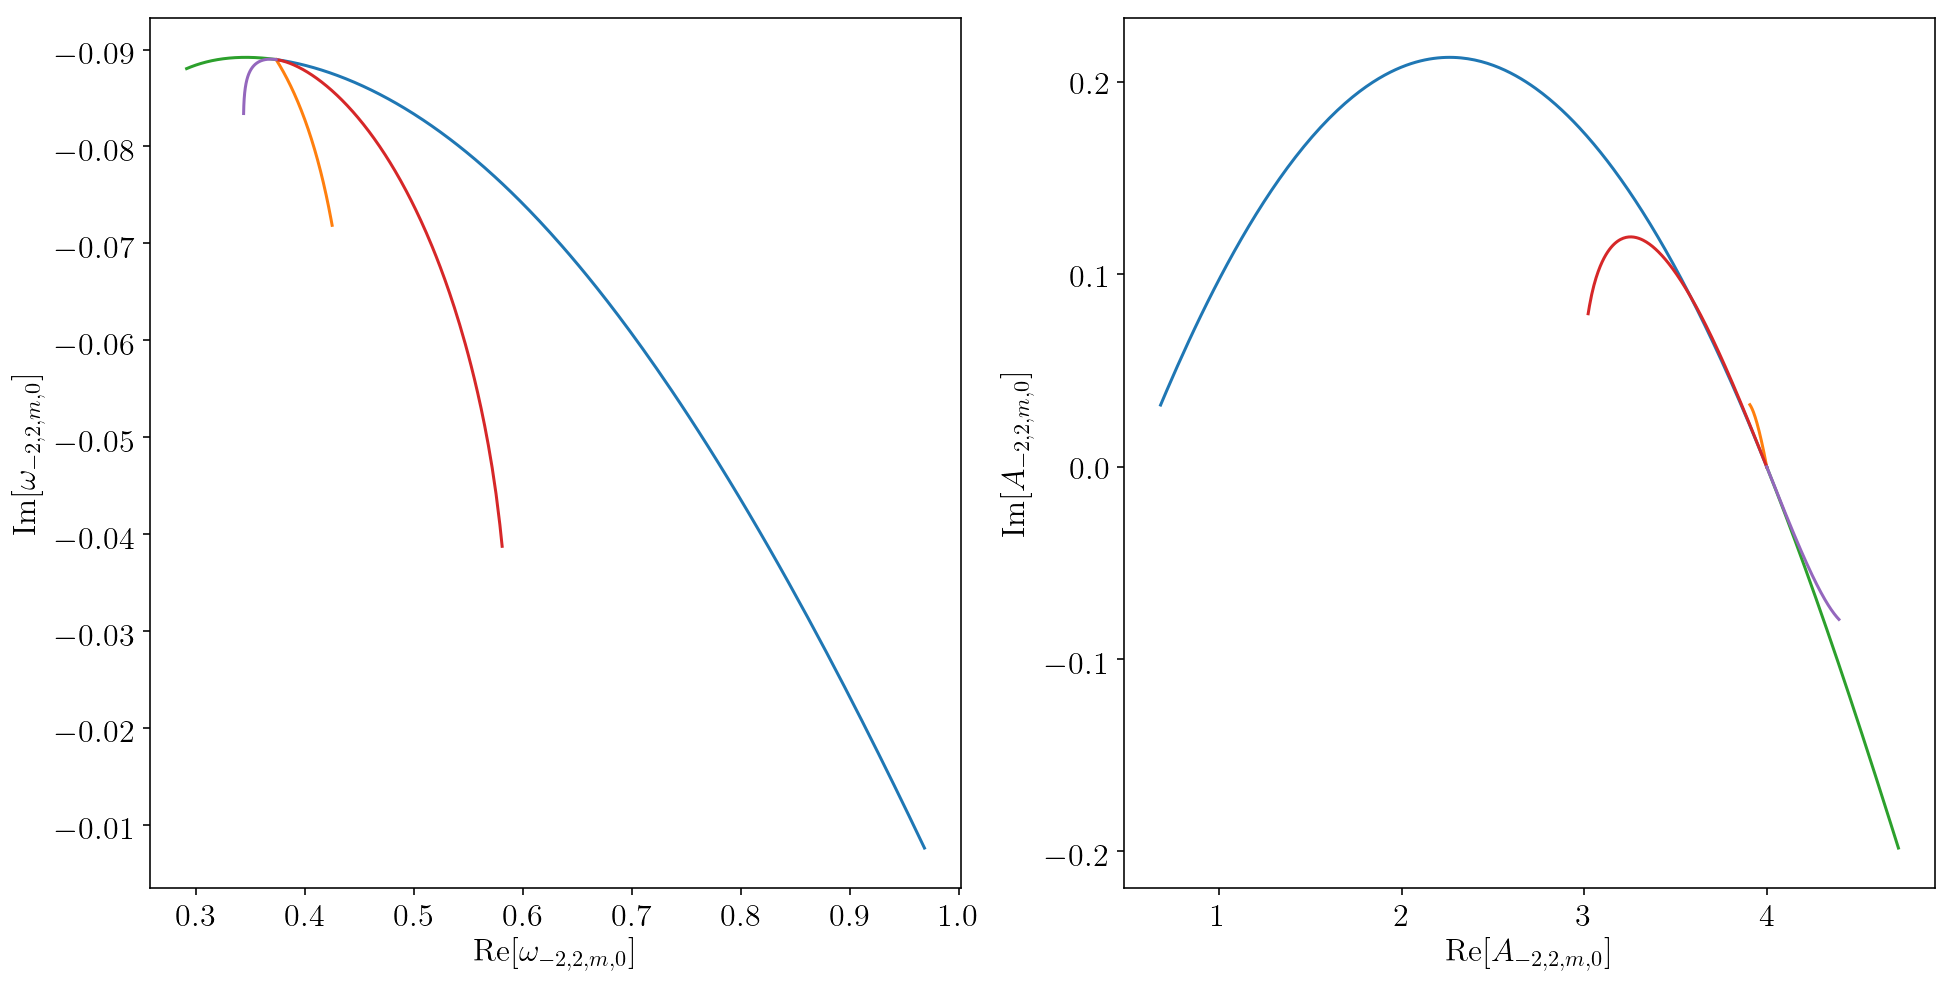

In [10]:
s, l, n = (-2, 2, 0)
mode_list = [(s, l, m, n) for m in np.arange(-l,l+1)]
modes = {}
for ind in mode_list:
    modes[ind] = ksc(*ind)

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)   
for mode, seq in modes.iteritems():
    plt.plot(np.real(seq.omega),np.imag(seq.omega))
    

modestr = "{},{},m,0".format(s,l)
plt.xlabel(r'$\textrm{Re}[\omega_{' + modestr + r'}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[\omega_{' + modestr + r'}]$', fontsize=16)
plt.gca().tick_params(labelsize=16)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)   
for mode, seq in modes.iteritems():
    plt.plot(np.real(seq.A),np.imag(seq.A))
    
plt.xlabel(r'$\textrm{Re}[A_{' + modestr + r'}]$', fontsize=16)
plt.ylabel(r'$\textrm{Im}[A_{' + modestr + r'}]$', fontsize=16)
plt.gca().tick_params(labelsize=16)

plt.savefig("example_2m0.png", bbox_inches="tight", dpi=300)

plt.show()